In [1]:
##Created By Unfriendly 
#(A simple Jupyter Notebook in Binder for Crypto price prediction)

historical_start = "6yr,0mon,0day,0hr,0min,0sec"
# How long to historically look back at data

predict_into = "0yr,0mon,10day,0hr,0min,0sec" 
# How far to try and predict into the future

In [2]:
import os, glob
for dirname, _, filenames in os.walk('/unfriendly/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Prepare data timestamps
import time
from datetime import datetime, timezone, timedelta
one_yr = 31536000000
one_mon = one_yr/12
one_day = one_yr/365
one_hr = one_day/24
one_min = one_hr/60
one_sec = one_min/60

In [6]:
# Prepare how far to look back in the past in UNIX time-format
history_split = historical_start.replace('yr', '')
history_res = history_split.replace('mon', '')
history_split = history_res.replace('day', '')
history_res = history_split.replace('hr', '')
history_split = history_res.replace('min', '')
history_res = history_split.replace('sec', '')
history_split = history_res.split(",")
print(history_split)

['6', '0', '0', '0', '0', '0']


In [7]:
# Prepare how far to predict into the future in UNIX time-format
predict_split = predict_into.replace('yr', '')
predict_res = predict_split.replace('mon', '')
predict_split = predict_res.replace('day', '')
predict_res = predict_split.replace('hr', '')
predict_split = predict_res.replace('min', '')
predict_res = predict_split.replace('sec', '')
predict_split = predict_res.split(",")
print(predict_split)

['0', '0', '10', '0', '0', '0']


In [8]:
history_array_yr = int(history_split[0])
unix_hist_yr = one_yr*history_array_yr

history_array_mon = int(history_split[1])
unix_hist_mon = one_mon*history_array_mon

history_array_day = int(history_split[2])
unix_hist_day = one_day*history_array_day

history_array_hr = int(history_split[3])
unix_hist_hr = one_hr*history_array_hr

history_array_min = int(history_split[4])
unix_hist_min = one_min*history_array_min

history_array_sec = int(history_split[5])
unix_hist_sec = one_sec*history_array_sec

In [9]:
predict_array_yr = int(predict_split[0])
unix_pred_yr = one_yr*predict_array_yr

predict_array_mon = int(predict_split[1])
unix_pred_mon = one_mon*predict_array_mon

predict_array_day = int(predict_split[2])
unix_pred_day = one_day*predict_array_day

predict_array_hr = int(predict_split[3])
unix_pred_hr = one_hr*predict_array_hr

predict_array_min = int(predict_split[4])
unix_pred_min = one_min*predict_array_min

predict_array_sec = int(predict_split[5])
unix_pred_sec = one_sec*predict_array_sec

unix_prediction = unix_pred_yr+unix_pred_mon+unix_pred_day+unix_pred_hr+unix_pred_min+unix_pred_sec

In [10]:
raw_time = time.time()
int_time = int(raw_time)
current_time = str(int_time)

unix_start = unix_hist_yr+unix_hist_mon+unix_hist_day+unix_hist_hr+unix_hist_min+unix_hist_sec
raw_start = raw_time - unix_start

int_start = int(raw_start)
start = str(int_start)

#print(unix_hist_yr+history_array_mon+history_array_day+history_array_hr+history_array_min+history_array_sec)
print(start + ' - start')

gather_count = int_start/(7*one_day)
gather_int = int(gather_count)
gather_str = str(gather_int)
pos_gather_count = abs(int(gather_count))
pos_gather_str = str(pos_gather_count)

print(gather_str + ' - gather')
print(pos_gather_str + ' - positive gather')

-187602017719 - start
-310 - gather
310 - positive gather


In [11]:
print((datetime.now(timezone.utc) + timedelta(hours=0)).timestamp() * 1e3)

dt = (datetime.now(timezone.utc) + timedelta(days=0)).timestamp() * 1e3

c_dt = int(dt)

c_dt_int = int(c_dt)
print(str(c_dt_int))

c_dt_array_year = history_array_yr*365

history_array_comb = history_array_day + c_dt_array_year

c_dt_start = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
print(str(c_dt_start_int))

c_dt_start_raw = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp()
c_dt_start_raw_int = int(c_dt_start_raw)
print(str(c_dt_start_raw))       
    
data_count = 0

c_dt_start_dt = datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00')

print(datetime.now(timezone.utc))
print(datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00'))

#c_dt_end = c_dt_start + timedelta(days=7).timestamp() * 1e3
#c_dt_end = (c_dt_start_dt + timedelta(days=7)).timestamp() * 1e3

c_dt_end = (datetime.utcfromtimestamp(c_dt_start_raw) + timedelta(days=7)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
c_dt_end_int = int(c_dt_end)
c_dt_end_str = str(c_dt_end)


c_dt_str = str(c_dt)
c_dt_start_str = str(c_dt_start_int)


ts_ten_int = int(c_dt/1000)
start_ten_int = int(c_dt_start_int/1000)

ts_ten_str = str(ts_ten_int)
start_ten_str = str(start_ten_int)


print(c_dt_start_int)
print(c_dt_end_int)
print(c_dt_int)
print('13 Digit Microsecond TS: ' + c_dt_start_str + ' - ' + '10 Digit TS: ' + start_ten_str)

1613982280325.333
1613982280325
1424766280325
1424766280.326334
2021-02-22 08:24:40.326834+00:00
2015-02-24 08:24:40.326334+00:00
1424766280325
1425389080326
1613982280325
13 Digit Microsecond TS: 1424766280325 - 10 Digit TS: 1424766280


In [12]:
import urllib.request
import yfinance as yf
from tradingfeatures import bitfinex
bitfinex = bitfinex()

#while count < pos_gather_count:
while data_count < 1:
    
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=" + current_time + "&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=1612158064&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+dt_str+"&period2="+dt_end_str+"&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+gather_str+"&period2="+current_time+"&interval=1m&events=history&includeAdjustedClose=true"
    
    
    d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+start_ten_str+"&period2="+ts_ten_str+"&interval=1d&events=history&includeAdjustedClose=true"
    
    print(d_u)
    
    with urllib.request.urlopen(d_u) as testfile, open('dataset.csv', 'w') as f:
        f.write(testfile.read().decode())

    data_count += 1  # This is the same as count = count + 1

https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1424766280&period2=1613982280&interval=1d&events=history&includeAdjustedClose=true


In [13]:
data = yf.download(tickers='BTC-USD', period='max', interval='1d', group_by='column', auto_adjust = True, prepost = True, threads = True, proxy = None)

[*********************100%***********************]  1 of 1 completed


In [14]:
#data=pd.read_csv('dataset.csv')
#data = yf.download(tickers='BTC-USD', period='max', interval='1d', group_by='column', auto_adjust = True, prepost = True, threads = True, proxy = None)


data.apply(pd.to_numeric, errors='coerce')

#data=data.dropna()
#data=data.dropna(inplace=True)
#data=data.dropna(subset=['Close'])
#data=data.dropna(how='any',axis=1)

data.dropna(subset=['Close'], inplace=True)
data.reset_index(drop=True)

data

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2021-02-18,52140.972656,52474.105469,51015.765625,51679.796875,52054723579
2021-02-19,51675.980469,56113.652344,50937.277344,55888.132812,63495496918
2021-02-20,55887.335938,57505.226562,54626.558594,56099.519531,68145460026


In [15]:
df1=data['Close']
df1

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2021-02-18    51679.796875
2021-02-19    55888.132812
2021-02-20    56099.519531
2021-02-21    57539.945312
2021-02-22    56374.437500
Name: Close, Length: 2347, dtype: float64

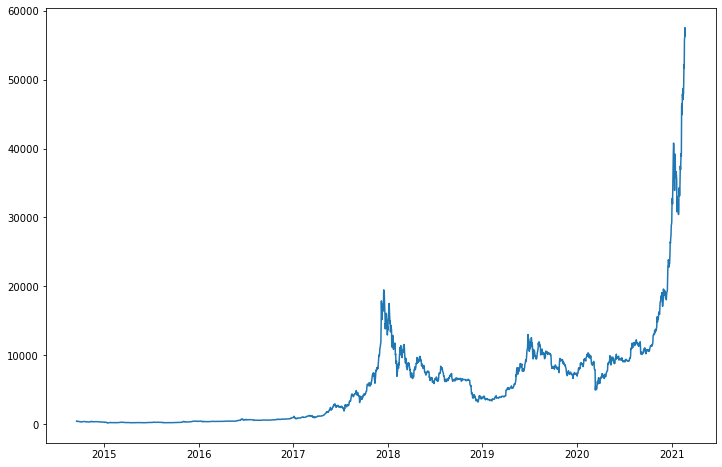

In [16]:
plt.plot(df1)

In [17]:
import numpy as np

In [18]:
df1

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2021-02-18    51679.796875
2021-02-19    55888.132812
2021-02-20    56099.519531
2021-02-21    57539.945312
2021-02-22    56374.437500
Name: Close, Length: 2347, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(1525, 822)

In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(1424, 100)
(1424,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(721, 100)
(721,)


(None, None)

In [26]:
X_train.shape[1]

100

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.optimizers import Adam, Adadelta, SGD, RMSprop, Adamax

In [29]:
#opt = Adam(lr=0.0001)
#opt = Adam(lr=0.0025)
#opt = Adadelta(lr=1, rho=0.95, epsilon=1e-6, decay=0, clipnorm=NULL, clipvalue=NULL)
#opt = Adadelta(lr=1, rho=0.95, epsilon=1e-6, decay=0)
#opt = RMSprop(lr=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False)
#opt = RMSprop(lr=0.0005, rho=0.9, momentum=0.0, epsilon=1e-07, centered=True)

#opt = Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True)

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

#model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(optimizer=opt, loss='mean_squared_error')

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=128,verbose=1)

In [ ]:
import tensorflow as tf
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plt.show()

print(plt.rcParams.get('figure.figsize'))

In [ ]:
len(test_data)
tdl_int = len(test_data)
tdl_length = tdl_int - 100
print(tdl_int)
print(tdl_length)

In [ ]:
x_input=test_data[tdl_length:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0

#Ten Days
#while(i<10):

while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)

#Ten Days
#day_pred=np.arange(101,111)

day_pred=np.arange(101,111)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)
df2_int = len(df1)
df2_length = df2_int - 100
print(df2_int)
print(df2_length)

In [ ]:
#plt.plot(day_new,scaler.inverse_transform(df1[2205:]))

plt.plot(day_new,scaler.inverse_transform(df1[df2_length:]))

plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
#plt.plot(df3[2206:])

df3_length = df2_length + 1

plt.plot(df3[df3_length:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)